# P2: Project proposal and initial analyses
When you are done with Homework H1, you will continue to work on the next project milestone. In Milestone P2, together with your team members, you will agree on and refine your project proposal. Your first task is to select a project. Even though we provide the datasets for you to use, at this juncture, it is your responsibility to perform initial analyses and verify that what you propose is feasible given the data (including any additional data you might bring in yourself), which is crucial for the success of the project.

The goal of this milestone is to intimately acquaint yourself with the data, preprocess it, and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you have clear project goals.

When describing the relevant aspects of the data, and any other datasets you may intend to use, you should in particular show (non-exhaustive list):

- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these steps have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project. We will also evaluate this milestone according to how clear, reasonable, and well thought-through the project idea is. Please use the second milestone to really check with us that everything is in order with your project (idea, feasibility, etc.) before you advance too much with the final Milestone P3! There will be project office hours dedicated to helping you.

You will work in a public GitHub repository dedicated to your project, which can be created by following this link. The repository will automatically be named ada-2023-project-<your_team_name>. By the Milestone P2 deadline, each team should have a single public GitHub repo under the epfl-ada GitHub organization, containing the project proposal and initial analysis code.

## P2 deliverable (done as a team): GitHub repository with the following:

- Readme.md file containing the detailed project proposal (up to 1000 words). Your README.md should contain:
  - Title
  - bstract: A 150 word description of the project idea and goals. What’s the motivation behind your project? What story would you like to tell, and why?
  - Research Questions: A list of research questions you would like to address during the project.
  - Proposed additional datasets (if any): List the additional dataset(s) you want to use (if any), and some ideas on how you expect to get, manage, process, and enrich it/them. Show us that you’ve read the docs and some examples, and that you have a clear idea on what to expect. Discuss data size and format if relevant. It is your responsibility to check that what you propose is feasible.
  - Methods
  - Proposed timeline
  - Organization within the team: A list of internal milestones up until project Milestone P3.
  - Questions for TAs (optional): Add here any questions you have for us related to the proposed project.
- Notebook containing initial analyses and data handling pipelines. We will grade the correctness, quality of code, and quality of textual descriptions.


In [132]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data with the correct format
data_folder = '../Data'
paths_folder = data_folder + '/wikispeedia_paths-and-graph'

# Define the columns of each dataframe
columns_f = ['hashedIpAddress','timestamp','durationInSec','path','rating']
columns_u = ['hashedIpAddress','timestamp','durationInSec','path','target', 'type']

# Define the path to each dataframe
finished_paths = paths_folder + '/paths_finished.tsv'
unfinished_paths = paths_folder + '/paths_unfinished.tsv'
distance_matrix_file = paths_folder + "/shortest-path-distance-matrix.txt"
articles_list_file = paths_folder + '/articles.tsv'

# Load the Data
df_success = pd.read_csv(finished_paths,comment='#',sep='\t',names=columns_f)
df_fail = pd.read_csv(unfinished_paths,comment='#',sep='\t',names=columns_u)

# Control
print('Finished Paths:')
display(df_success)

print('Unfinished Paths:')
display(df_fail)

# Find the median timestamp in df_success
median_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').median()
max_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').max()

# Find the median timestamp in df_fail
median_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').median()
max_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').max()

# Convert the median timestamps to human-readable format
median_timestamp_success_human = median_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
median_timestamp_fail_human = median_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_success_human = max_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_fail_human = max_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')

# Print the median timestamps in human-readable format
print('Median Timestamp in df_success:', median_timestamp_success_human)
print('Median Timestamp in df_fail:', median_timestamp_fail_human)
print('Max Timestamp in df_success:', max_timestamp_success_human)
print('Max Timestamp in df_fail:', max_timestamp_fail_human)


Finished Paths:


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


Unfinished Paths:


,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


Median Timestamp in df_success: 2010-09-07 21:16:24
Median Timestamp in df_fail: 2012-09-25 15:23:43
Max Timestamp in df_success: 2014-01-15 22:00:50
Max Timestamp in df_fail: 2014-01-15 21:54:01


In [133]:
df_fail = df_fail[~((df_fail.type == 'timeout') &
                    (~df_fail['path'].str.contains(';')))].copy()   #find() returns -1 if not in str. Not finding a ; means player stayed at start
                                                                                                #Writing the inverse condition with a not is more clear


In [134]:
paths_success = df_success.path.apply(lambda x: x.split(';')).copy()
df_success['target'] = paths_success.apply(lambda x: x[len(x)-1])
df_fail.path = df_fail.path.map(str) + ';' + df_fail.target.map(str)


In [135]:
with open(distance_matrix_file, 'r') as file:
    content = file.read()

# Convert to a 2D list representing the distance matrix
rows = content.strip().split('\n')[17:]
distance_matrix = [[int(dist) if dist != '_' else -1 for dist in row] for row in rows]

# We need to get the list of articles as presented in the data, in order to know their index in the dataset, and hence interpret our distance matrix
articles = pd.read_csv("../data/wikispeedia_paths-and-graph/articles.tsv", sep='\t', skiprows= 11, skip_blank_lines=True)
articles_arr = articles.values
article_list = (item[0] for item in articles_arr)

article_index_map = {article: index for index, article in enumerate(article_list)}

In [136]:
columns_cat = ['article', 'category', 'sub_category', 'sub_sub_category']
df_categories = pd.read_csv(paths_folder + '/categories.tsv', comment='#',sep='\t',names=columns_cat)

def split_categories(row):
    categories = row.category.split('.')[1:]    #Drop the "subject."
    row['category'] = categories[0]
    if len(categories) > 1:
        row['sub_category'] = categories[1]
    if len(categories) > 2:
        row['sub_sub_category'] = categories[2]
    return row

df_categories = df_categories.apply(split_categories, axis=1).copy()

In [137]:
def get_distance(row):
    start_index = int(row.start)
    end_index = int(row.end)
    if start_index is None or end_index is None:
        return -1
    return distance_matrix[start_index][end_index]

def augment(df):
    df_out = df.copy()
    df_out['start'] = df.path.apply(lambda x: article_index_map.get(x.split(';')[0])).copy()
    df_out['end']   = df.path.apply(lambda x: article_index_map.get(x.split(';')[-1])).copy()
    df_out = df_out.dropna(axis=0, subset=['end']).copy()
    df_out['game_len'] = df_out.path.apply(lambda x: len(x.split(';')) - 1).copy()
    df_out['optimal_len'] = df_out.apply(get_distance, axis = 1).copy()
    return df_out


In [138]:
#Let's augment our success Dataframe, with the start and end id, as well as a game_len and optimal_len column
df_success = augment(df_success)
df_fail = augment(df_fail)



Now that we succesfully applied this to our DataFrame, let's apply this to our 4 focus games, and see what we get!

In [149]:
import pycountry

def get_iso_code(row):
    try:
        country = pycountry.countries.search_fuzzy(row['Country'])[0]
        return country.alpha_3
    except LookupError:
        return None



In [151]:

df_combined = pd.concat([df_success.assign(success=1), df_fail.assign(success=0)])

# Merge df_categories with the target article
merged_df = pd.merge(df_combined, df_categories, left_on='target', right_on='article')
countries_data = merged_df[merged_df['category'] == 'Countries']['target']

# Count the number of appearances of each country
country_counts = countries_data.value_counts()

# Calculate the average success rate
average_success_rate = merged_df[merged_df['category'] == 'Countries'].groupby('target')['success'].mean()

# Create a dataframe with the country counts and average success rate
df_countries = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values, 'Average Success Rate': average_success_rate.values})

df_countries['Average Excess Path Length'] = df_success['game_len'] - df_success['optimal_len']

display(df_countries)

df_countries['ISO'] = df_countries.apply(get_iso_code, axis=1)
df_countries = df_countries.drop_duplicates(subset='ISO')

display(df_countries)



,Country,Count,Average Success Rate,Average Excess Path Length
0,China,118,1.000000,5
1,Vietnam,109,0.916667,1
2,Japan,91,0.937500,4
3,Russia,88,1.000000,1
4,Canada,76,0.909091,3
...,...,...,...,...
220,South_Ossetia,5,0.750000,1
221,Martinique,4,1.000000,1
222,British_Indian_Ocean_Territory,3,1.000000,1
223,Saint_Kitts_and_Nevis,3,0.888889,0


SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='NG-NI', country_code='NG', name='Niger', parent_code=None, type='State')
SubdivisionHierarchy(code='PA-8', country_code='PA', name='Panamá', parent_code=None, type='Province')
SubdivisionHierarchy(code='DJ-DJ', country_code='DJ', name='Djibouti', parent_code=None, type='City')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
SubdivisionHierarchy(code='GN-ML', country_code='GN', name='Mali', parent='L', parent_code='GN-L', type='Prefecture')
SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU'

,Country,Count,Average Success Rate,Average Excess Path Length,ISO
0,China,118,1.000000,5,CHN
1,Vietnam,109,0.916667,1,VNM
2,Japan,91,0.937500,4,JPN
3,Russia,88,1.000000,1,RUS
4,Canada,76,0.909091,3,CAN
...,...,...,...,...,...
213,Guam,6,0.965517,1,GUM
214,Mauritania,6,0.888889,0,MRT
215,Honduras,6,0.800000,2,HND
216,Abkhazia,6,0.923077,2,GEO


In [152]:
import requests
# Define the base URL for the World Bank API
base_url = "http://api.worldbank.org/v2"
# Define the parameters for the API request
year = "2011"
indicators = ["NY.GDP.MKTP.CD", "SP.POP.TOTL"]  # GDP (current US$) and total population

def get_pop_data(row):
    country = row['ISO']
    # Send a GET request to the World Bank API
    response = requests.get(f"{base_url}/country/{country}/indicator/SP.POP.TOTL?date={year}&format=json")
    data = response.json()
    try:
        return data[1][0]['value']
    except:
        return None
    
def get_gdp_data(row):
    country = row['ISO']
    # Send a GET request to the World Bank API
    response = requests.get(f"{base_url}/country/{country}/indicator/NY.GDP.MKTP.CD?date={year}&format=json")
    data = response.json()
    try:
        return data[1][0]['value']
    except:
        return None


df_countries['Population'] = df_countries.apply(get_pop_data, axis=1)
df_countries['GDP'] = df_countries.apply(get_gdp_data, axis=1)

display(df_countries)

,Country,Count,Average Success Rate,Average Excess Path Length,ISO,Population,GDP
0,China,118,1.000000,5,CHN,1.345035e+09,7.551546e+12
1,Vietnam,109,0.916667,1,VNM,8.834912e+07,1.725950e+11
2,Japan,91,0.937500,4,JPN,1.278330e+08,6.233147e+12
3,Russia,88,1.000000,1,RUS,1.429609e+08,2.045923e+12
4,Canada,76,0.909091,3,CAN,3.433933e+07,1.793327e+12
...,...,...,...,...,...,...,...
213,Guam,6,0.965517,1,GUM,1.656490e+05,4.984000e+09
214,Mauritania,6,0.888889,0,MRT,3.524249e+06,6.764628e+09
215,Honduras,6,0.800000,2,HND,8.622504e+06,1.771028e+10
216,Abkhazia,6,0.923077,2,GEO,3.756441e+06,1.510749e+10


In [156]:
# Normalize population
mean_population = df_countries['Population'].mean()
sigma_population = df_countries['Population'].std()
df_countries['  Population'] = (df_countries['Population'] - mean_population) / sigma_population

# Normalize GDP
mean_gdp = df_countries['GDP'].mean()
sigma_gdp = df_countries['GDP'].std()
df_countries['Normalized GDP'] = (df_countries['GDP'] - mean_gdp) / sigma_gdp

df_countries['GDP per capita'] = df_countries['GDP'] / df_countries['Population']


display(df_countries)


,Country,Count,Average Success Rate,Average Excess Path Length,ISO,Population,GDP,Normalized Population,Normalized GDP,GDP per capita
0,China,118,1.000000,5,CHN,1.345035e+09,7.551546e+12,8.161413,7.180968,5614.386022
1,Vietnam,109,0.916667,1,VNM,8.834912e+07,1.725950e+11,0.273095,-0.198742,1953.557150
2,Japan,91,0.937500,4,JPN,1.278330e+08,6.233147e+12,0.520938,5.862434,48760.078949
3,Russia,88,1.000000,1,RUS,1.429609e+08,2.045923e+12,0.615898,1.674778,14311.064346
4,Canada,76,0.909091,3,CAN,3.433933e+07,1.793327e+12,-0.065929,1.422156,52223.696112
...,...,...,...,...,...,...,...,...,...,...
182,Lesotho,10,0.921053,0,LSO,2.037677e+06,2.579410e+09,-0.268689,-0.368776,1265.857945
183,Uzbekistan,10,0.931034,0,UZB,2.933940e+07,6.017891e+10,-0.097314,-0.311170,2051.129515
184,Luxembourg,10,1.000000,2,LUX,5.183470e+05,6.169628e+10,-0.278226,-0.309653,119025.057203
185,Armenia,10,1.000000,2,ARM,2.928976e+06,1.014211e+10,-0.263094,-0.361212,3462.681778


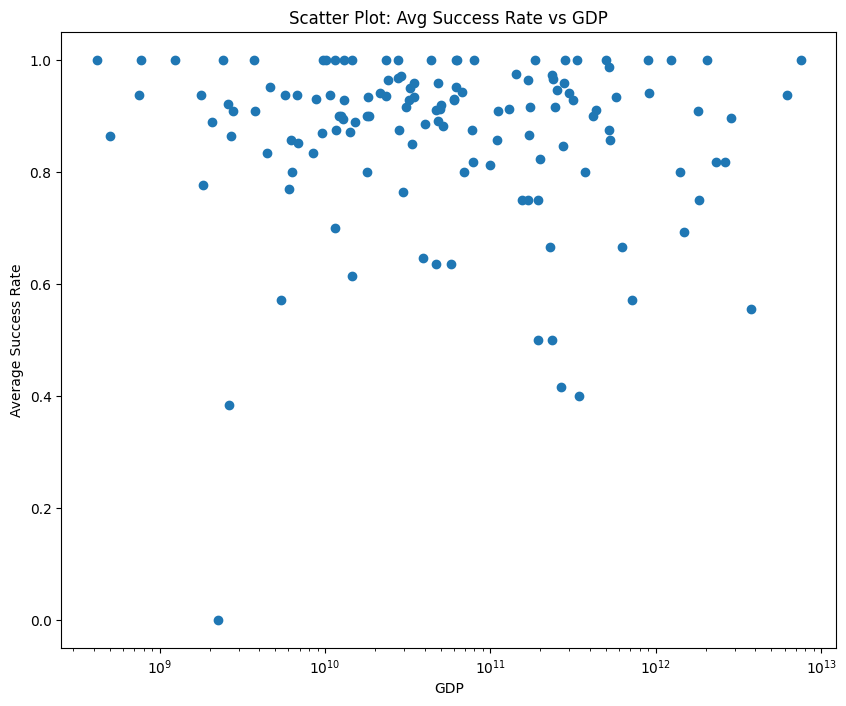

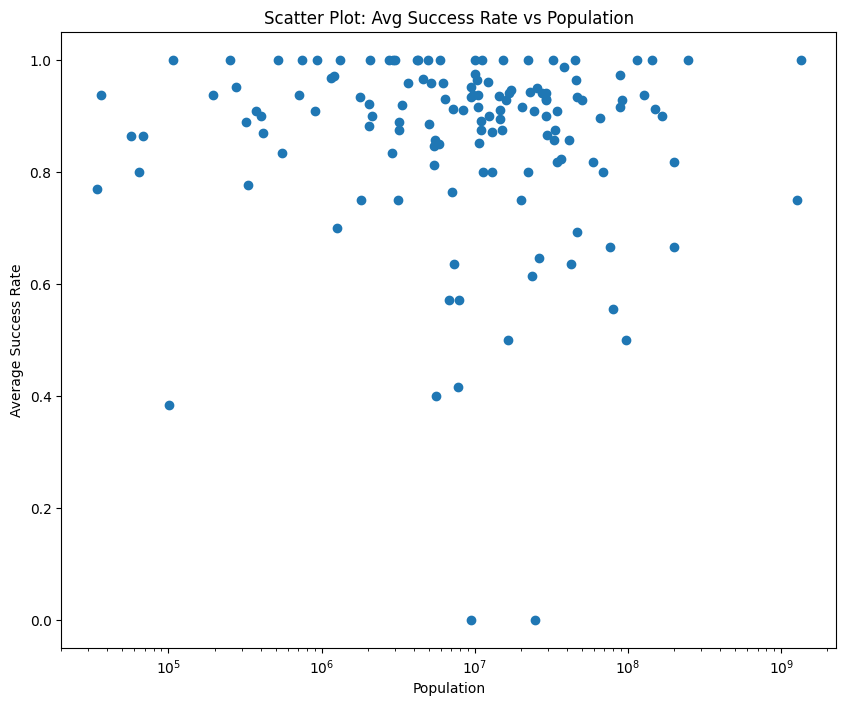

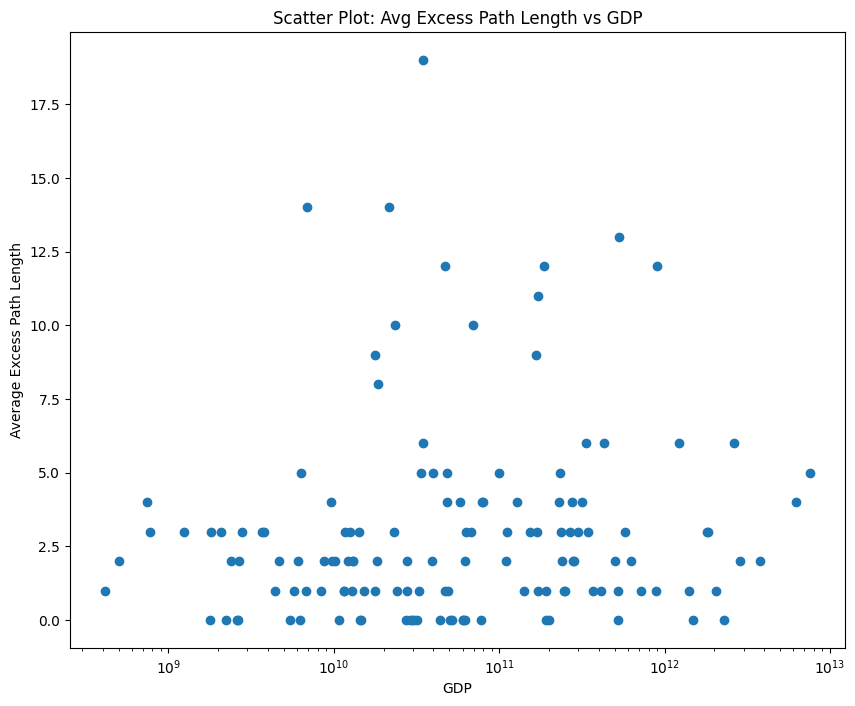

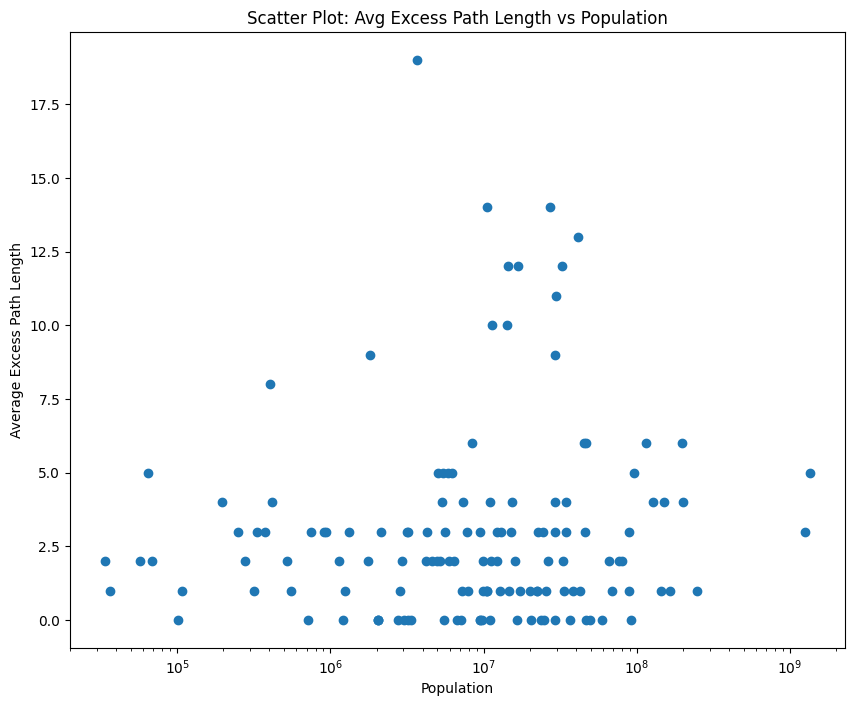

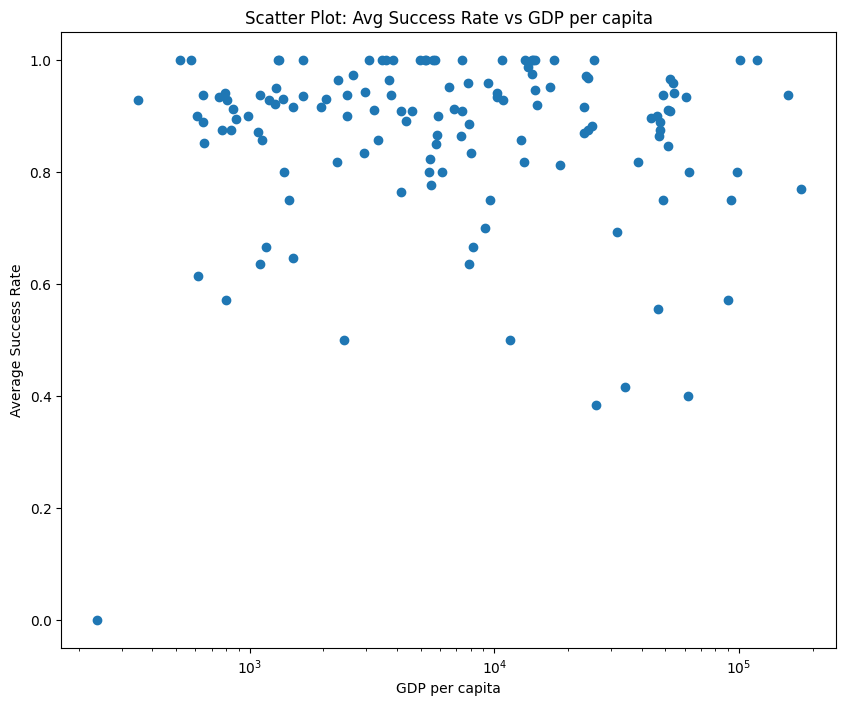

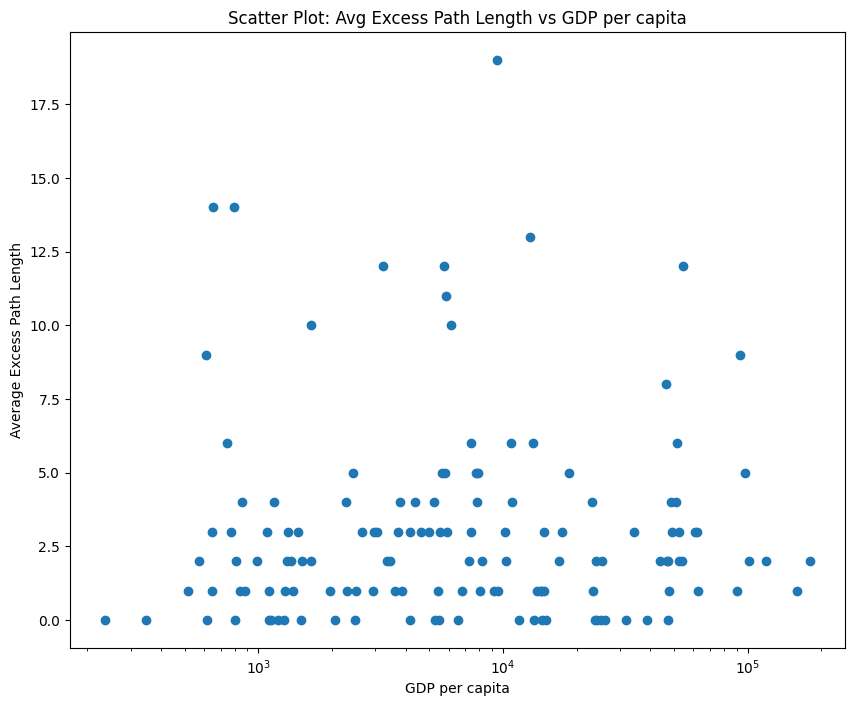

In [160]:
import matplotlib.pyplot as plt

df_countries = df_countries[df_countries.Count > 9].copy()

# Graph 1: Avg success rate on y, GDP on x
plt.figure(figsize=(10, 8))
plt.scatter(df_countries['GDP'], df_countries['Average Success Rate'])
plt.xlabel('GDP')
plt.ylabel('Average Success Rate')
plt.title('Scatter Plot: Avg Success Rate vs GDP')
plt.xscale('log')
plt.show()

# Graph 2: Avg success rate on y, Population on x
plt.figure(figsize=(10, 8))
plt.scatter(df_countries['Population'], df_countries['Average Success Rate'])
plt.xlabel('Population')
plt.ylabel('Average Success Rate')
plt.title('Scatter Plot: Avg Success Rate vs Population')
plt.xscale('log')
plt.show()

# Graph 3: Avg excess path length on y, GDP on x
plt.figure(figsize=(10, 8))
plt.scatter(df_countries['GDP'], df_countries['Average Excess Path Length'])
plt.xlabel('GDP')
plt.ylabel('Average Excess Path Length')
plt.title('Scatter Plot: Avg Excess Path Length vs GDP')
plt.xscale('log')
plt.show()

# Graph 4: Avg excess path length on y, Population on x
plt.figure(figsize=(10, 8))
plt.scatter(df_countries['Population'], df_countries['Average Excess Path Length'])
plt.xlabel('Population')
plt.ylabel('Average Excess Path Length')
plt.title('Scatter Plot: Avg Excess Path Length vs Population')
plt.xscale('log')
plt.show()

# Graph 5: Avg success rate y, GDP per capita on x
plt.figure(figsize=(10, 8))
plt.scatter(df_countries['GDP per capita'], df_countries['Average Success Rate'])
plt.xlabel('GDP per capita')
plt.ylabel('Average Success Rate')
plt.title('Scatter Plot: Avg Success Rate vs GDP per capita')
plt.xscale('log')
plt.show()

# Graph 3: Avg excess path length on y, GDP per capita on x
plt.figure(figsize=(10, 8))
plt.scatter(df_countries['GDP per capita'], df_countries['Average Excess Path Length'])
plt.xlabel('GDP per capita')
plt.ylabel('Average Excess Path Length')
plt.title('Scatter Plot: Avg Excess Path Length vs GDP per capita')
plt.xscale('log')
plt.show()